In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 

In [2]:
ogallnba = pd.read_html('https://www.basketball-reference.com/awards/all_league.html')[0].dropna()

In [3]:
ogallnba.drop(['Lg','Tm'],axis = 1, inplace = True)

In [4]:
allnba_df = pd.DataFrame()

In [5]:
for x, y in ogallnba.iterrows():
    
    # This is used to reshape this array into being "long" rather than "wide".
    
    for column in y:
        if column == y[0]:
            year = y[0] 
    
        else:
            row = pd.DataFrame([[year,column[:-1],column[-1:]]])
            allnba_df = pd.concat([row,allnba_df],ignore_index = True)
            
            
allnba_df.head()

,0,1,2
0,1966-67,Sam Jones,G
1,1966-67,Hal Greer,G
2,1966-67,Willis Reed,F
3,1966-67,Jerry Lucas,F
4,1966-67,Bill Russell,C


In [6]:
# Renaming the Columns

allnba_df.rename(columns = {0: 'Year', 1 : 'Player' , 2 : 'Position'} , inplace = True)



# Cleaning data by removing invalid rows. 
allnba_df = allnba_df[allnba_df['Position'] != ')']

#Creating a "start" year column so that it's easier to work with. 
allnba_df['Start Year'] = 0
allnba_df.loc[:,('Start Year')] = allnba_df['Year'].apply(lambda x: x.split('-')[0])
allnba_df.loc[:,('Start Year')] = allnba_df['Start Year'].astype(int)

#Previous to 1989 there were only two All-NBA teams per year.
#For the sake of consistency, I will data from years previous to 1989. 
allnba_df= allnba_df[allnba_df['Start Year'] >= 1989]

#Stripping excess characters from our "Player" column.
allnba_df['Player'] = allnba_df['Player'].apply(lambda x: x.strip('*').rstrip())

#Resetting the index. 
allnba_df.reset_index(drop = True,inplace = True)

allnba_df.head()

,Year,Player,Position,Start Year
0,1989-90,Joe Dumars,G,1989
1,1989-90,Clyde Drexler,G,1989
2,1989-90,James Worthy,F,1989
3,1989-90,Chris Mullin,F,1989
4,1989-90,David Robinson,C,1989


In [7]:
#Creation of a data frame that includes all NBA players. 

#This loop is used to get scrape data from multiple web pages from basketball reference.
#I chose to do this because it makes more since to do it this way than to download 20+ csv's individually.
#It loops through each webpage, and then appends the new to the main data frame. 


nbaYear= 1989 #This is the starting year.
initPage = 0 
while nbaYear <= datetime.date.today().year:
    
    if initPage == 0:
    
        iterPage = pd.read_html('https://www.basketball-reference.com/leagues/NBA_'+str(nbaYear)+'_totals.html')
        iterPage = iterPage[0]
        iterPage['Year'] = str(nbaYear-1)+'-'+str(nbaYear)[-2:]
        nbaDF = iterPage
        nbaYear += 1 
        initPage = 1 
    else:
        iterPage = pd.read_html('https://www.basketball-reference.com/leagues/NBA_'+str(nbaYear)+'_totals.html')
        iterPage = iterPage[0]
        iterPage['Year'] = str(nbaYear-1)+'-'+str(nbaYear)[-2:]
        nbaDF = pd.concat([iterPage,nbaDF])
        nbaYear += 1 

nbaDF = nbaDF.reset_index(drop= True)

In [8]:
nbaDF.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,146,327,473,82,37,41,84,151,664,2021-22
1,2,Steven Adams,C,28,MEM,76,75,1999,210,384,...,349,411,760,256,65,60,115,153,528,2021-22
2,3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,137,427,564,190,80,44,148,171,1068,2021-22
3,4,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,33,54,87,21,6,10,16,36,132,2021-22
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,73,185,258,42,14,47,44,78,607,2021-22
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,1466,253,680,...,37,150,187,156,46,23,93,103,692,2021-22
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,1317,237,632,...,36,128,164,139,41,19,85,88,639,2021-22
7,6,Nickeil Alexander-Walker,SG,23,UTA,15,2,149,16,48,...,1,22,23,17,5,4,8,15,53,2021-22
8,7,Grayson Allen,SG,26,MIL,66,61,1805,255,569,...,32,190,222,100,46,18,43,96,733,2021-22
9,8,Jarrett Allen,C,23,CLE,56,56,1809,369,545,...,192,410,602,92,44,75,94,97,904,2021-22


In [9]:
#Data Cleaning. Removing "Player" rows.
nbaDF.drop(nbaDF[nbaDF['Player'] == "Player"].index, inplace = True)

nbaDF['Player'] = nbaDF['Player'].apply(lambda x: x.strip('*').rstrip())

In [10]:
#In our Dataframes, there will be multiple instances of the same person for the same year.
#This is because BasketBall Reference seperates stats for a player when the player gets traded to a different team.
#However they also keep track of the players total stats for the year.
#It seems that they've made it so that the player's total is always before the other instances of their names.

nbaDF[(nbaDF['Year'] == '2018-19') &  (nbaDF['Player'] == 'Ryan Anderson')]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
2265,16,Ryan Anderson,PF,30,TOT,25,8,322,21,69,...,18,36,54,19,4,1,14,25,63,2018-19
2266,16,Ryan Anderson,PF,30,PHO,15,8,278,19,60,...,14,31,45,17,3,1,12,23,56,2018-19
2267,16,Ryan Anderson,PF,30,MIA,10,0,44,2,9,...,4,5,9,2,1,0,2,2,7,2018-19


In [11]:
#This code will get rid of all the 'non-total' stats. 
#I am aware that issues would be caused if there were two players with the same name.
#According to the internet there has never been two players with the same name in the same season.

previousPlayer = 0

for x, y in nbaDF.iterrows():
    if y[0] == previousPlayer:
        nbaDF.drop(x, inplace = True)
        previousPlayer = y[0]
        
    else:
        previousPlayer = y[0]
nbaDF.reset_index(drop = True,inplace = True)

In [12]:
#We can see here that for the 2018-19 season, Ryan Anderson is now only shwon once. 

nbaDF[(nbaDF['Year'] == '2018-19') &  (nbaDF['Player'] == 'Ryan Anderson')]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
1689,16,Ryan Anderson,PF,30,TOT,25,8,322,21,69,...,18,36,54,19,4,1,14,25,63,2018-19


In [13]:
#Creation of an "All NBA" variable for our general NBA data frame. 

nbaDF['All Nba'] = 0

#This is going the set the 'All NBA' value to 1 for players that received the award in that year. 

for x,y in allnba_df.iterrows():
    allnbaindex = nbaDF[(nbaDF['Year'] == y[0]) & (nbaDF['Player'] == y[1])].index
    nbaDF.loc[(allnbaindex,'All Nba')] = 1
    

In [14]:
#The position of a player is very important when it comes to reaching an all NBA team.
#This is because making the all NBA team doesn't mean your a top 15 player.
#Making an all NBA team means that you were a top 6 at your position when it comes to Guards / Forwards.
#Or top 3 at your position when it comes to Centers. 
#I've decided to ommit the 'Guard' dummy variable. Meaning if they get a 0 on both Forward and Center.
#Our model will know they are a guard. 

#I will admit that this is an "imperfect" way to solve this issue. In the NBA "positions" can be extremely fluid.
#This is especially the case when it comes to All NBA voting. It's not really clear what the difference between
#A "Center" and a "Power Forward" is, other than be comparing the players with the other players on the court. 
#Some years a player will get voted as a Power Forward, other years as a Center. Some times a taller Guard will get a Forward
#spot in the all nba voting, and vice versa.
#Despite this being imperfect, it at least matches the imperfection of All NBA voting. 

nbaDF['Forward'] = 0
nbaDF['Center'] = 0

for x,y in nbaDF.iterrows():
    if nbaDF.loc[(x,'Pos')] == 'SF' or nbaDF.loc[(x,'Pos')] == 'PF':
        nbaDF.loc[(x,'Forward')] = 1 
    elif nbaDF.loc[(x,'Pos')] == 'C':
        nbaDF.loc[(x,'Center')] = 1 

In [15]:
nbaDF.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G          object
GS         object
MP         object
FG         object
FGA        object
FG%        object
3P         object
3PA        object
3P%        object
2P         object
2PA        object
2P%        object
eFG%       object
FT         object
FTA        object
FT%        object
ORB        object
DRB        object
TRB        object
AST        object
STL        object
BLK        object
TOV        object
PF         object
PTS        object
Year       object
All Nba     int64
Forward     int64
Center      int64
dtype: object

In [21]:
#Changing "object" data types into Floats. Removing variables that won't be used for model. 
players = nbaDF['Player']
nbaDF = nbaDF[['Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2P%','eFG%',
       'FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS','All Nba','Forward','Center']].astype(float)
nbaDF['Player'] = players

<AxesSubplot:>

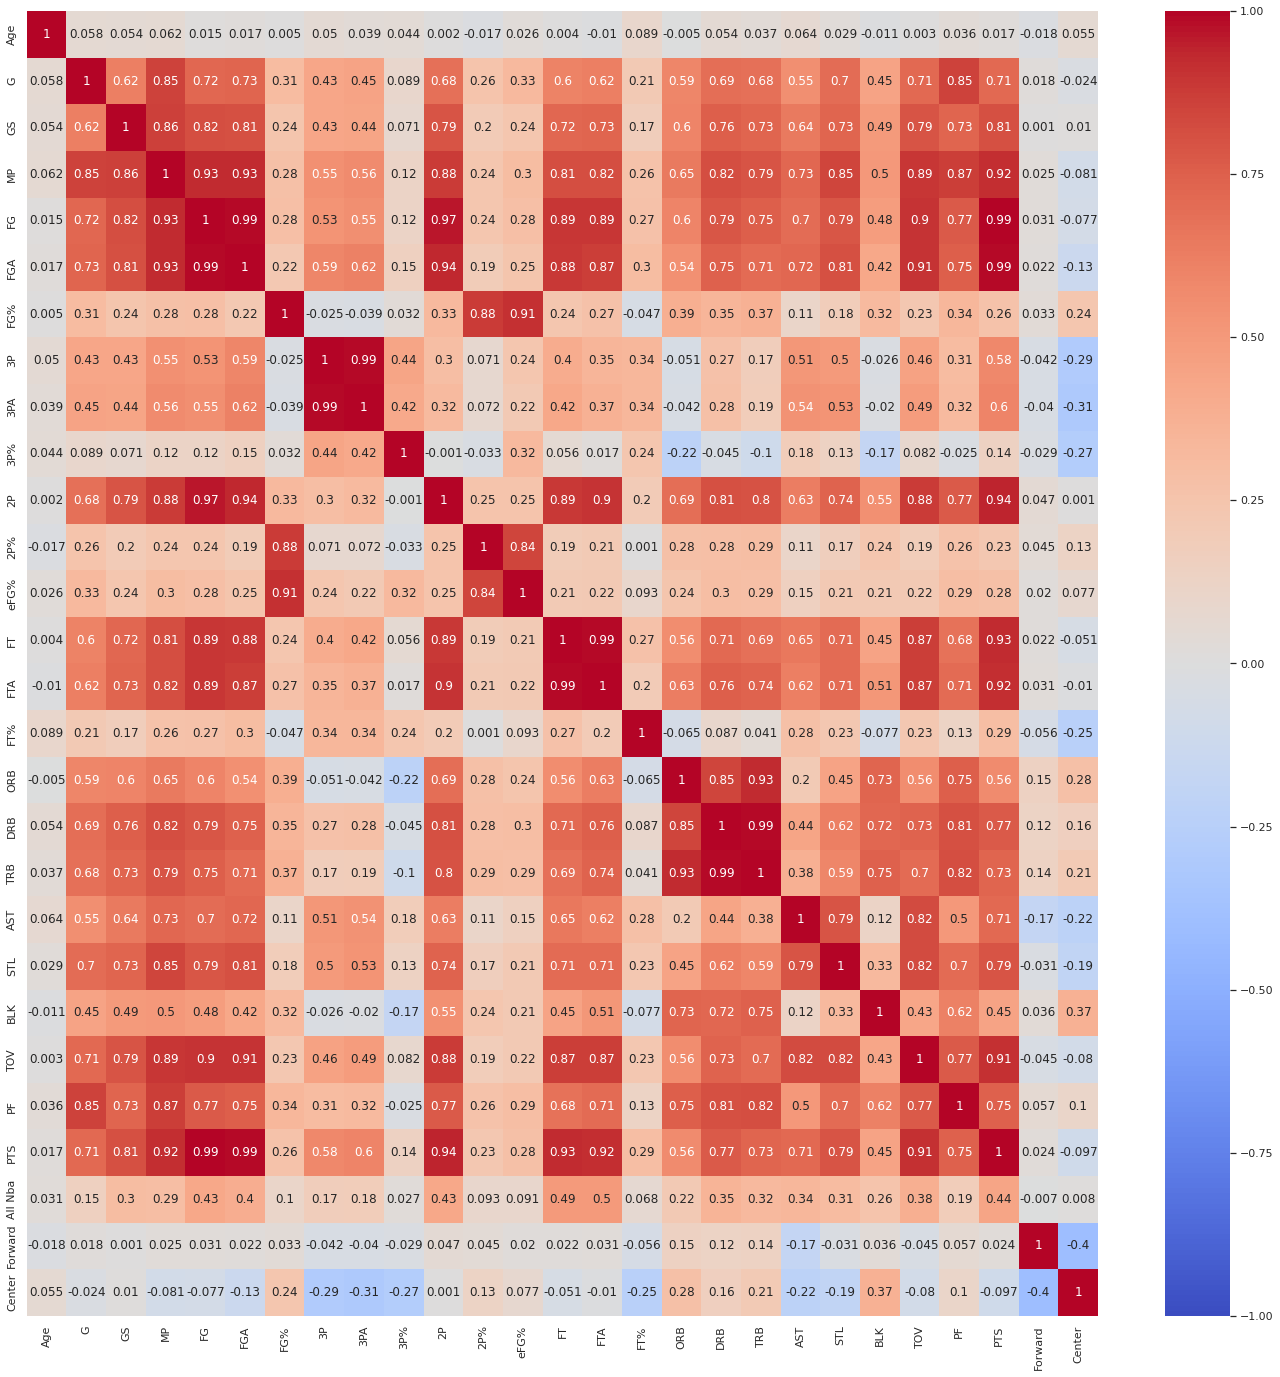

In [22]:
#Highly correlated variables should be removed when doing a logistic regression.
#A correlation plot makes it easy to visualize which ones can be removed. 

sns.set(rc={"figure.figsize":(24,24)})

sns.heatmap(nbaDF.corr().drop(columns = ["All Nba"]).round(3),cmap="coolwarm",vmin = -1, vmax = 1,annot = True)


I am personally a big fan of basketball, so I understand where a lot of these correlations come from without neccesarilly having to dig much deeper than this heatmap. 

Some of our more obvious problem variables are Games Played (G), Games Started (GS), Minutes Played (MP), Field Goals (FG), Field Goal Attempts (FGA), Turnovers(TOV) Personal Fouls (PF) and Points (PTS). Dropping a few of these columns and doing a bit of feature engineering will help us out in this case. 



In [23]:
#Total games will always be correlated with stat totals. So transforming the stats to "Per Game" values should help.
#To deal with thing such as field goals, field goal attempts, and points being correlated, I chose to keep the points value.
#I will drop both Defensive Rebounds and Offensive rebounds and keep Total Rebounds. 


nbaDF['RPG'] = nbaDF['TRB'] / nbaDF['G']
nbaDF['PPG'] = nbaDF['PTS'] / nbaDF['G']
nbaDF['TOV Per Game'] = nbaDF['TOV'] / nbaDF['G']
nbaDF['MPG'] = nbaDF['MP'] / nbaDF['G']
nbaDF['% of GS'] = nbaDF['GS']/nbaDF['G']
nbaDF['APG'] = nbaDF['AST'] / nbaDF['G']
nbaDF['SPG'] = nbaDF['STL']/nbaDF['G']
nbaDF['BPG'] = nbaDF['BLK']/nbaDF['G']
nbaDF['Assist/Turnover Ratio'] = nbaDF['AST']/nbaDF['TOV']





In [24]:
nbaDF.drop(columns = ['GS','MP','PF','PTS','ORB','TRB','FG','FGA','FG%','3P','3PA','3P%','2P','2P%','FT','FTA','ORB','DRB','TOV','AST','BLK','STL'],inplace = True)

<AxesSubplot:>

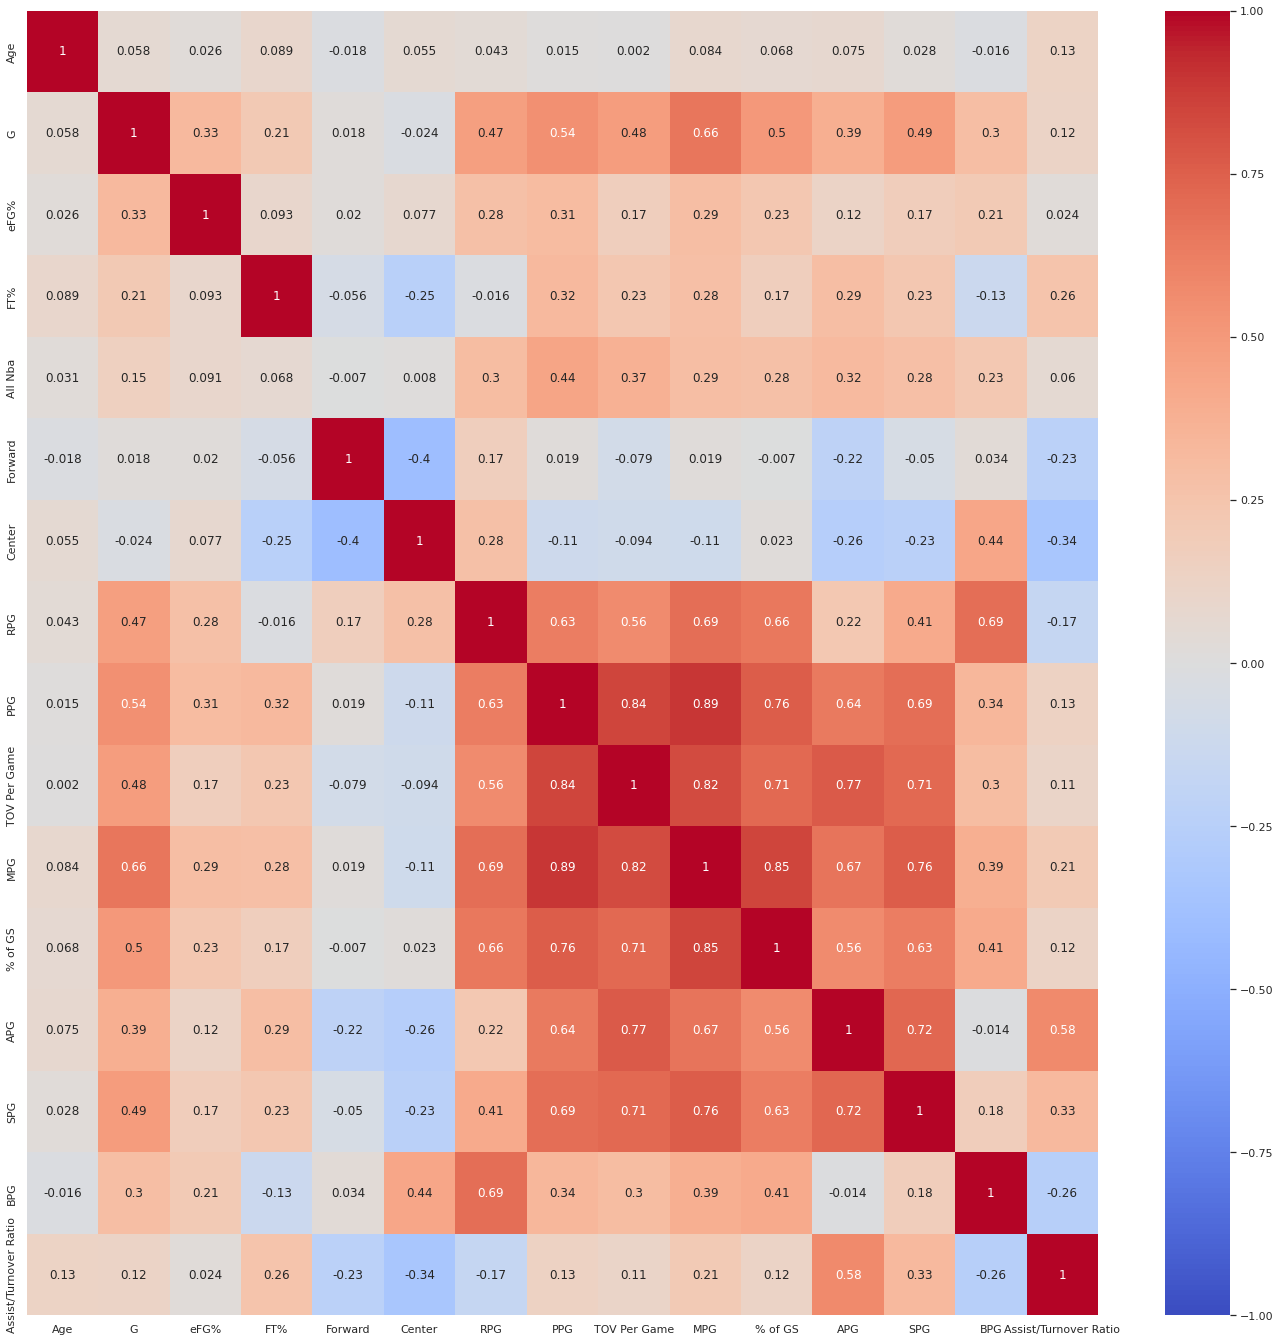

In [25]:
sns.set(rc={"figure.figsize":(24,24)})

sns.heatmap(nbaDF.corr().drop(columns = ["All Nba"]).round(3),cmap="coolwarm",vmin = -1, vmax = 1,annot = True)

In [26]:
#Dropping NAN's and infs.

nbaDF.replace([np.inf, -np.inf], np.nan,inplace=True)
nbaDF.dropna(inplace = True)

#Using Variance Inflation Factor, we can futher reduce colinearity in our variables. 

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
vif_X = nbaDF.drop(columns = ["Player","All Nba"])

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = vif_X.columns
vif["VIF"] = [variance_inflation_factor(vif_X.values, i) for i in range(vif_X.shape[1])]

vif.sort_values('VIF', ascending=False)
 

,variables,VIF
9,MPG,70.859219
2,eFG%,33.672527
0,Age,32.858434
3,FT%,29.965219
8,TOV Per Game,27.624321
7,PPG,19.389775
11,APG,15.613258
6,RPG,14.036403
1,G,11.322655
14,Assist/Turnover Ratio,10.109899


As we can see above. Our VIF values are still pretty high, so we have a lot of work to do. Before removing anything else, I'm going to go ahead and do a bit more feature engineering.

In [27]:
#Totaling together offensive stats and defensive stats. 
nbaDF['Off Count'] = nbaDF['PPG'] +nbaDF['APG']
nbaDF['Def Count'] = nbaDF['RPG'] + nbaDF['SPG'] + nbaDF['BPG']

nbaDF.drop(columns = ['PPG','APG','RPG','SPG','BPG'],inplace = True)

In [28]:

# Repeating steps for finding VIF. 
#Dropping NAN's and infs.

nbaDF.replace([np.inf, -np.inf], np.nan,inplace=True)
nbaDF.dropna(inplace = True)

#Using Variance Inflation Factor, we can futher reduce colinearity in our variables. 

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
vif_X = nbaDF.drop(columns = ["Player","All Nba"])

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = vif_X.columns
vif["VIF"] = [variance_inflation_factor(vif_X.values, i) for i in range(vif_X.shape[1])]

vif.sort_values('VIF', ascending=False)

,variables,VIF
7,MPG,67.039891
2,eFG%,33.262772
0,Age,32.740620
3,FT%,28.992788
10,Off Count,27.297141
6,TOV Per Game,17.685461
11,Def Count,13.981814
1,G,11.259603
8,% of GS,7.831257
9,Assist/Turnover Ratio,5.589563


In [29]:
#Sparring you the iterations that I went through to reduce VIF substantially, here is the final set of variables for our data.


nbaDF.drop(columns = ["MPG","eFG%",'Age',"TOV Per Game","FT%","G"],inplace = True)

nbaDF.head()

,All Nba,Forward,Center,Player,% of GS,Assist/Turnover Ratio,Off Count,Def Count
0,0.0,0.0,1.0,Precious Achiuwa,0.383562,0.976190,10.219178,7.547945
1,0.0,0.0,1.0,Steven Adams,0.986842,2.226087,10.315789,11.644737
2,0.0,0.0,1.0,Bam Adebayo,1.000000,1.283784,22.464286,12.285714
3,0.0,1.0,0.0,Santi Aldama,0.000000,1.312500,4.781250,3.218750
4,0.0,0.0,1.0,LaMarcus Aldridge,0.255319,0.954545,13.808511,6.787234


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [37]:
y = nbaDF['All Nba']
x = nbaDF.drop(columns = ['Player','All Nba'])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)

In [39]:
logmodel = LogisticRegression(solver = 'sag' , max_iter = 10000)
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4291
         1.0       0.73      0.59      0.65       137

    accuracy                           0.98      4428
   macro avg       0.86      0.79      0.82      4428
weighted avg       0.98      0.98      0.98      4428



In [54]:
print(confusion_matrix(y_test,predictions))

[[4261   30]
 [  56   81]]


In [61]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))


Accuracy: 0.9805781391147245
Precision: 0.7297297297297297
Recall: 0.5912408759124088


In [46]:
yx = x_test.join(y_test)